In [36]:
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [37]:
data_merge = pd.read_csv("C:\\Users\\asus\\BigContest\\files\\data_preprocessing\\ver_2_3_merge_data.csv")
data_merge

,base_date,emd_cd,korean_resd_f0,korean_work_f0,korean_visit_f0,korean_resd_f10,korean_work_f10,korean_visit_f10,korean_resd_f20,korean_work_f20,...,korean_resd_m60,korean_work_m60,korean_visit_m60,korean_resd_m70,korean_work_m70,korean_visit_m70,korean_resd_m80,korean_work_m80,korean_visit_m80,waste_amt
0,2019-11-30,50110250,595656.6904,75850.2547,244450.7884,470973.4183,58210.9861,190021.1853,320859.0111,35541.8894,...,9.803283e+05,64510.8733,412777.5716,462903.2294,14949.1031,130905.9135,316369.2533,8414.2938,71774.4096,2279550
1,2019-12-31,50110250,652151.7585,61500.4928,226945.5000,515642.8981,47098.8555,176849.9974,332910.6583,31108.4411,...,1.042920e+06,54769.1474,356647.7173,475781.6367,14572.9457,133060.6767,325170.9463,8482.1220,73314.9065,31493650
2,2020-01-31,50110250,636463.4354,27210.6699,399362.9784,503238.4661,21032.9124,311991.9034,331482.3683,38458.0489,...,1.039688e+06,63895.7106,345317.5147,498917.8941,9754.4773,97718.5716,340983.3250,5471.7085,54101.8748,49632850
3,2020-02-29,50110250,602907.6061,10699.8444,188481.2982,476706.5663,8391.0285,146962.6067,327308.5271,27226.7952,...,9.829013e+05,68664.7858,329660.2978,470861.8783,10751.8373,102608.8361,321808.5589,6080.5963,56601.9260,46197050
4,2020-03-31,50110250,642258.4013,11387.4048,183057.2598,507820.4275,8839.0273,142351.2402,349132.2653,24328.9595,...,1.081765e+06,66324.8183,374835.4358,525689.0973,24380.3455,110250.7900,359279.9913,13307.4003,61633.6654,52561750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629,2021-02-28,50130620,106554.7117,515.3878,188420.8433,69829.5432,393.8831,147680.5081,124420.8042,69683.5399,...,1.615357e+05,33944.3906,185865.3256,96869.1285,3392.4050,60849.0952,72584.3886,1813.6854,33586.5245,15566250
1630,2021-03-31,50130620,100670.5675,1651.9066,70897.6992,65973.4305,1264.1962,55205.7049,137125.1918,79959.4419,...,1.752911e+05,38533.5056,245080.5467,109278.5526,5560.0581,72014.7975,81882.8147,2958.7652,39916.2166,17300600
1631,2021-04-30,50130620,94585.3320,1265.9660,79003.5640,61985.5337,967.5094,61643.0341,145934.6720,82938.6389,...,1.653582e+05,39654.5395,276591.1410,107051.8896,2540.5234,81552.0756,80214.3661,1376.1945,44899.0090,17646850
1632,2021-05-31,50130620,102822.4935,2202.7842,141224.2364,67383.6726,1688.2686,110464.9987,158768.6248,89178.4000,...,1.760794e+05,38623.3075,265545.3991,103384.6804,4546.0320,81058.3047,77466.5160,2647.8493,44401.0198,19494750


xgboost 모델링

In [38]:
X_features = data_merge.loc[:, ['korean_resd_f0', 'korean_work_f0', 'korean_visit_f0', 
                      'korean_resd_f10', 'korean_work_f10', 'korean_visit_f10', 
                      'korean_resd_f20', 'korean_work_f20', 'korean_visit_f20', 
                      'korean_resd_f30', 'korean_work_f30', 'korean_visit_f30', 
                      'korean_resd_f40', 'korean_work_f40', 'korean_visit_f40', 
                      'korean_resd_f50', 'korean_work_f50', 'korean_visit_f50', 
                      'korean_resd_f60', 'korean_work_f60', 'korean_visit_f60', 
                      'korean_resd_f70', 'korean_work_f70', 'korean_visit_f70', 
                      'korean_resd_f80', 'korean_work_f80', 'korean_visit_f80', 
                      'korean_resd_m0', 'korean_work_m0', 'korean_visit_m0', 
                      'korean_resd_m10', 'korean_work_m10', 'korean_visit_m10', 
                      'korean_resd_m20', 'korean_work_m20', 'korean_visit_m20', 
                      'korean_resd_m30', 'korean_work_m30', 'korean_visit_m30', 
                      'korean_resd_m40', 'korean_work_m40', 'korean_visit_m40', 
                      'korean_resd_m50', 'korean_work_m50', 'korean_visit_m50', 
                      'korean_resd_m60', 'korean_work_m60', 'korean_visit_m60', 
                      'korean_resd_m70', 'korean_work_m70', 'korean_visit_m70', 
                      'korean_resd_m80', 'korean_work_m80', 'korean_visit_m80']]
y_label = data_merge.loc[:, 'waste_amt']

In [39]:
# 전체 데이터셋을 학습용 80%, 테스트용 20%로 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(1307, 54) (327, 54)


In [40]:
# 넘파이 형태의 학습 데이터 세트와 테스트 데이터를 DMatrix로 변환하는 예제
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [41]:
# max_depth = 3, 학습률은 0.1, 목적함수(objective)는 reg:linear(회귀)
# 오류함수의 평가성능지표는 rmse
# 부스팅 반복횟수는 400
# 조기중단을 위한 최소 반복횟수는 100

params = {'max_depth' : 7,
         'eta' : 0.1, 
         'objective' : 'reg:linear',
         'eval_metric' : 'rmsle',
         'early_stoppings' : 100 }
num_rounds = 1000

In [42]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval' 로 명기
wlist = [(dtrain, 'train'), (dtest,'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[13:23:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[13:23:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "early_stoppings" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmsle:2.31425	eval-rmsle:2.33470
[1]	train-rmsle:1.67257	eval-rmsle:1.69789
[2]	train-rmsle:1.31759	eval-rmsle:1.33317
[3]	train-rmsle:1.07930	eval-rmsle:1.10176
[4]	train-rmsle:0.90844	eval-rmsle:0.93117
[5]	train-rmsle:0.77869	eval-rmsle:0.80139
[6]	train-rmsle:0.67569	eval-rmsle:0.69982
[7]	train-rmsle:0.59262	eval-rmsle:0.61845
[8]	train-rmsle:0.52396	eval-rmsle:0.55044
[9]	train-rmsle:0.46800	eval-rmsle:0.4970

[171]	train-rmsle:0.03555	eval-rmsle:0.23885
[172]	train-rmsle:0.03478	eval-rmsle:0.23881
[173]	train-rmsle:0.03454	eval-rmsle:0.23883
[174]	train-rmsle:0.03432	eval-rmsle:0.23881
[175]	train-rmsle:0.03428	eval-rmsle:0.23881
[176]	train-rmsle:0.03406	eval-rmsle:0.23872
[177]	train-rmsle:0.03336	eval-rmsle:0.23851
[178]	train-rmsle:0.03317	eval-rmsle:0.23849
[179]	train-rmsle:0.03268	eval-rmsle:0.23843
[180]	train-rmsle:0.03251	eval-rmsle:0.23843
[181]	train-rmsle:0.03250	eval-rmsle:0.23842
[182]	train-rmsle:0.03231	eval-rmsle:0.23846
[183]	train-rmsle:0.03199	eval-rmsle:0.23849
[184]	train-rmsle:0.03178	eval-rmsle:0.23847
[185]	train-rmsle:0.03153	eval-rmsle:0.23845
[186]	train-rmsle:0.03147	eval-rmsle:0.23846
[187]	train-rmsle:0.03146	eval-rmsle:0.23846
[188]	train-rmsle:0.03064	eval-rmsle:0.23841
[189]	train-rmsle:0.03044	eval-rmsle:0.23839
[190]	train-rmsle:0.03000	eval-rmsle:0.23841
[191]	train-rmsle:0.02981	eval-rmsle:0.23839
[192]	train-rmsle:0.02923	eval-rmsle:0.23833
[193]	trai

[354]	train-rmsle:0.00538	eval-rmsle:0.23719
[355]	train-rmsle:0.00533	eval-rmsle:0.23720
[356]	train-rmsle:0.00525	eval-rmsle:0.23719
[357]	train-rmsle:0.00509	eval-rmsle:0.23719
[358]	train-rmsle:0.00509	eval-rmsle:0.23719
[359]	train-rmsle:0.00509	eval-rmsle:0.23719
[360]	train-rmsle:0.00499	eval-rmsle:0.23718
[361]	train-rmsle:0.00485	eval-rmsle:0.23719
[362]	train-rmsle:0.00474	eval-rmsle:0.23720
[363]	train-rmsle:0.00466	eval-rmsle:0.23720
[364]	train-rmsle:0.00460	eval-rmsle:0.23720
[365]	train-rmsle:0.00460	eval-rmsle:0.23720
[366]	train-rmsle:0.00455	eval-rmsle:0.23721
[367]	train-rmsle:0.00450	eval-rmsle:0.23720
[368]	train-rmsle:0.00449	eval-rmsle:0.23720
[369]	train-rmsle:0.00445	eval-rmsle:0.23720
[370]	train-rmsle:0.00439	eval-rmsle:0.23721
[371]	train-rmsle:0.00437	eval-rmsle:0.23720
[372]	train-rmsle:0.00437	eval-rmsle:0.23720
[373]	train-rmsle:0.00432	eval-rmsle:0.23721
[374]	train-rmsle:0.00431	eval-rmsle:0.23721
[375]	train-rmsle:0.00428	eval-rmsle:0.23720
[376]	trai

[536]	train-rmsle:0.00100	eval-rmsle:0.23712
[537]	train-rmsle:0.00100	eval-rmsle:0.23712
[538]	train-rmsle:0.00099	eval-rmsle:0.23712
[539]	train-rmsle:0.00099	eval-rmsle:0.23712
[540]	train-rmsle:0.00098	eval-rmsle:0.23712
[541]	train-rmsle:0.00097	eval-rmsle:0.23711
[542]	train-rmsle:0.00096	eval-rmsle:0.23711
[543]	train-rmsle:0.00096	eval-rmsle:0.23711
[544]	train-rmsle:0.00095	eval-rmsle:0.23711
[545]	train-rmsle:0.00095	eval-rmsle:0.23711
[546]	train-rmsle:0.00094	eval-rmsle:0.23711
[547]	train-rmsle:0.00093	eval-rmsle:0.23711
[548]	train-rmsle:0.00093	eval-rmsle:0.23711
[549]	train-rmsle:0.00090	eval-rmsle:0.23711
[550]	train-rmsle:0.00090	eval-rmsle:0.23711
[551]	train-rmsle:0.00089	eval-rmsle:0.23711
[552]	train-rmsle:0.00088	eval-rmsle:0.23711
[553]	train-rmsle:0.00087	eval-rmsle:0.23711
[554]	train-rmsle:0.00086	eval-rmsle:0.23711
[555]	train-rmsle:0.00086	eval-rmsle:0.23711
[556]	train-rmsle:0.00084	eval-rmsle:0.23711
[557]	train-rmsle:0.00084	eval-rmsle:0.23711
[558]	trai

[718]	train-rmsle:0.00019	eval-rmsle:0.23710
[719]	train-rmsle:0.00019	eval-rmsle:0.23710
[720]	train-rmsle:0.00019	eval-rmsle:0.23710
[721]	train-rmsle:0.00019	eval-rmsle:0.23710
[722]	train-rmsle:0.00019	eval-rmsle:0.23710
[723]	train-rmsle:0.00019	eval-rmsle:0.23710
[724]	train-rmsle:0.00019	eval-rmsle:0.23710
[725]	train-rmsle:0.00018	eval-rmsle:0.23710
[726]	train-rmsle:0.00018	eval-rmsle:0.23710
[727]	train-rmsle:0.00018	eval-rmsle:0.23710
[728]	train-rmsle:0.00018	eval-rmsle:0.23710
[729]	train-rmsle:0.00017	eval-rmsle:0.23710
[730]	train-rmsle:0.00017	eval-rmsle:0.23710
[731]	train-rmsle:0.00017	eval-rmsle:0.23710
[732]	train-rmsle:0.00016	eval-rmsle:0.23710
[733]	train-rmsle:0.00016	eval-rmsle:0.23710
[734]	train-rmsle:0.00016	eval-rmsle:0.23710
[735]	train-rmsle:0.00016	eval-rmsle:0.23710
[736]	train-rmsle:0.00016	eval-rmsle:0.23710
[737]	train-rmsle:0.00016	eval-rmsle:0.23710
[738]	train-rmsle:0.00016	eval-rmsle:0.23710
[739]	train-rmsle:0.00016	eval-rmsle:0.23710
[740]	trai

[901]	train-rmsle:0.00003	eval-rmsle:0.23710
[902]	train-rmsle:0.00003	eval-rmsle:0.23710
[903]	train-rmsle:0.00003	eval-rmsle:0.23710
[904]	train-rmsle:0.00003	eval-rmsle:0.23710
[905]	train-rmsle:0.00003	eval-rmsle:0.23710
[906]	train-rmsle:0.00003	eval-rmsle:0.23710
[907]	train-rmsle:0.00003	eval-rmsle:0.23710
[908]	train-rmsle:0.00003	eval-rmsle:0.23710
[909]	train-rmsle:0.00003	eval-rmsle:0.23710
[910]	train-rmsle:0.00003	eval-rmsle:0.23710
[911]	train-rmsle:0.00003	eval-rmsle:0.23710
[912]	train-rmsle:0.00003	eval-rmsle:0.23710
[913]	train-rmsle:0.00003	eval-rmsle:0.23710
[914]	train-rmsle:0.00003	eval-rmsle:0.23710
[915]	train-rmsle:0.00003	eval-rmsle:0.23710
[916]	train-rmsle:0.00003	eval-rmsle:0.23710
[917]	train-rmsle:0.00003	eval-rmsle:0.23710
[918]	train-rmsle:0.00003	eval-rmsle:0.23710
[919]	train-rmsle:0.00003	eval-rmsle:0.23710
[920]	train-rmsle:0.00003	eval-rmsle:0.23710
[921]	train-rmsle:0.00003	eval-rmsle:0.23710
[922]	train-rmsle:0.00003	eval-rmsle:0.23710
[923]	trai

In [43]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[1.9677896e+07 1.8225181e+08 2.7102060e+07 2.4057395e+08 4.5924136e+07
 3.2355374e+07 6.0874344e+07 4.6932612e+07 1.1460402e+08 9.6979416e+07]
예측값 10개만 표시:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [44]:
# 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 불러오기
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [45]:
get_clf_eval(y_test, preds)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

feature importance 시각화

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

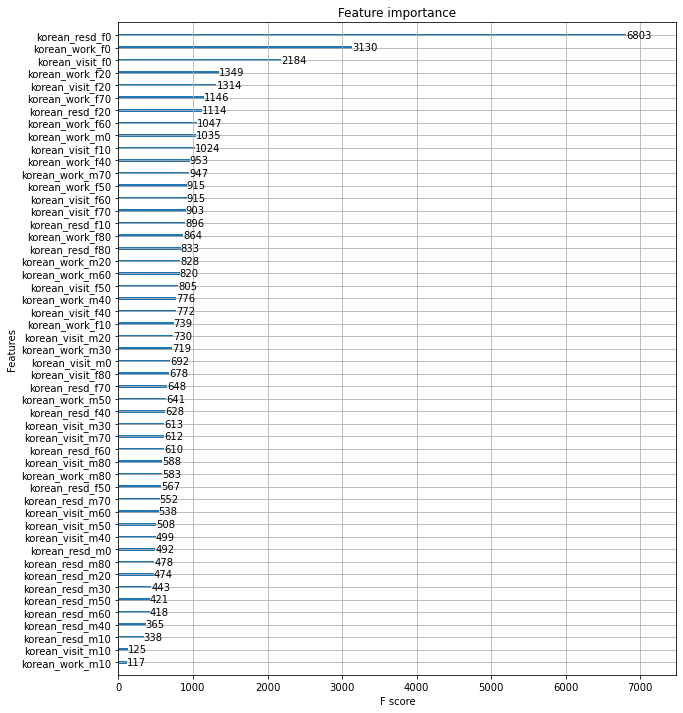

In [46]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)